# 深層学習前編（day1）: 実装演習

本書は、「深層学習前編（day1）レポート」の、実装演習についてのものです。


### 1_1_forward_propagation.ipynb


#### キャプチャ

自身の環境において、最終コードセル[10]までの実行を確認した。


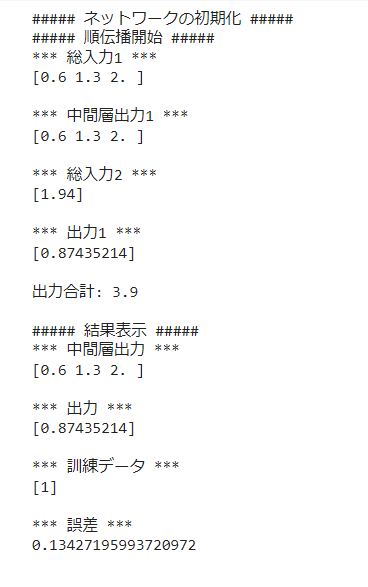

#### 内容

実装演習の際、確認した内容を記録する。


##### 順伝播（単層・単ユニット）


"試してみよう_配列の初期化" と、
"試してみよう_数値の初期化" の適用前では、

```
*** 重み ***
[[0.1]
 [0.2]]
shape: (2, 1)

*** バイアス ***
0.5
shape: ()

*** 入力 ***
[2 3]
shape: (2,)

*** 総入力 ***
[1.3]
shape: (1,)

*** 中間層出力 ***
[1.3]
shape: (1,)
```

に対して、例えば、以下の様に初期値を変更した。

```python
W = np.array([np.zeros(2)]).T
...
b = np.array(np.random.rand()) # 0~1のランダム数値
```

```
*** 重み ***
[[0.]
 [0.]]
shape: (2, 1)

*** バイアス ***
0.8339799944409114
shape: ()

*** 入力 ***
[2 3]
shape: (2,)

*** 総入力 ***
[0.83397999]
shape: (1,)

*** 中間層出力 ***
[0.83397999]
shape: (1,)
```

総入力と中間層出力が変動。重みとバイアスの初期値の違いにより学習まで時間に影響があることを確認した。


##### 順伝播（単層・複数ユニット）

"単ユニット"と、"複数ユニット" の違いは、ノード数の違い。
ここでは、 3 ユニット。


`u = np.dot(W, x) + b` の `shape` と計算を確認。

$$
\textbf{u} = \begin{pmatrix}
0.1 & 0.2 & 0.3 & 0.0 \\
0.2 & 0.3 & 0.4 & 0.5 \\
0.3 & 0.4 & 0.5 & 1.0
\end{pmatrix}
\begin{pmatrix}
1.0 \\
5.0 \\
2.0 \\
-1.0
\end{pmatrix}
+
\begin{pmatrix}
0.1 \\
0.2 \\
0.3
\end{pmatrix}
$$


"試してみよう_配列の初期化" を以下の例で試行。

```python
W = np.zeros((3, 4))
```

勿論、中間層出力に影響。


##### 順伝播（3層・複数ユニット）


以下のパターンを使用し、 `shape' の確認と、乱数値による初期化を行った。
(例: `network['W1']`)

```python

>>> import numpy as np
>>> np.random.rand(2, 3)
array([[0.71838598, 0.52541408, 0.68880153],
       [0.97132167, 0.65628634, 0.20339805]])
>>> np.random.rand(2, 3).shape
(2, 3)
```


##### 多クラス分類（2-3-4ネットワーク）

"試してみよう_ノードの構成を 3-5-4 に変更してみよう" において、
1層目の行と2層目の列を追加した。

以下の通り、試行した。しかし、クロスエントロピー誤差は "2-3-4" より大きくなった。
( 解答例の "1_1_forward_propagation_after.ipynb" の "2-5-6" の場合小さくなっていた )



In [ ]:
import numpy as np

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    print("shape: " + str(x.shape))
    print("")


In [ ]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

NUM_OF_NODES_INPUT = 3
NUM_OF_NODES_HIDDEM = 5
NUM_OF_NODES_OUTPUT = 4

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    network['W1'] = np.random.rand(NUM_OF_NODES_INPUT, NUM_OF_NODES_HIDDEM)
    network['W2'] = np.random.rand(NUM_OF_NODES_HIDDEM, NUM_OF_NODES_OUTPUT)

    network['b1'] = np.random.rand(NUM_OF_NODES_HIDDEM)
    network['b2'] = np.random.rand(NUM_OF_NODES_OUTPUT)
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2., 3.])

# 目標出力
# NOTE: 期待値 = 訓練データの正解値
d = np.array([0, 0, 0, 1, 0])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)



##### ネットワークの初期化 #####
*** 重み1 ***
[[0.49450785 0.63387722 0.28582262 0.47303624 0.16302736]
 [0.06802596 0.86712157 0.66420551 0.93063584 0.43549654]
 [0.63403562 0.43622873 0.48438778 0.025264   0.49311774]]
shape: (3,)

*** 重み2 ***
[[0.08671211 0.62562158 0.61976309 0.80535187]
 [0.04323612 0.13295371 0.19848983 0.46750741]
 [0.78958921 0.40449468 0.52645647 0.35006728]
 [0.05262864 0.02321406 0.71034412 0.23300425]
 [0.80489836 0.38167966 0.29924073 0.05492127]]
shape: (3,)

*** バイアス1 ***
[0.66012292 0.64846722 0.55962917 0.87770497 0.02422616]
shape: (3,)

*** バイアス2 ***
[0.13549943 0.78806085 0.30499618 0.5569592 ]
shape: (3,)

##### 順伝播開始 #####
*** 総入力1 ***
[3.19278954 4.32527377 3.62702614 3.28780488 2.53759984]
shape: (3,)

*** 中間層出力1 ***
[3.19278954 4.32527377 3.62702614 3.28780488 2.53759984]
shape: (3,)

*** 総入力2 ***
[5.67876434 5.87258639 8.14658959 7.32551969]
shape: (3,)

*** 出力1 ***
[0.05208128 0.06322044 0.61439058 0.2703077 ]
shape: (3,)

出力合計: 1.0

##### 結果表示 #####
**

##### 回帰（2-3-2ネットワーク）

ニューラルネットワークの回帰への適用について、理解できなかったため、以下を参照した。

- [重回帰](https://rinsaka.com/python/mra2.html#results)<br>
> 重回帰分析がうまく行かない例

- [ニューラルネットワーク](https://rinsaka.com/python/nn-regression.html)<br>
> 重回帰分析に失敗するようなデータについて，ニューラルネットワーク（ディープラーニング／深層学習）による回帰分析を行って推定や予測


##### 2値分類（2-3-1ネットワーク）

基本的には、 "多クラス分類" と同じであり、出力層を 1 ノードにして、確率を得ることを確認した。


### 1_1_forward_propagation_after.ipynb


#### キャプチャ

自身の環境において、最終コードセル[10]までの実行を確認した。


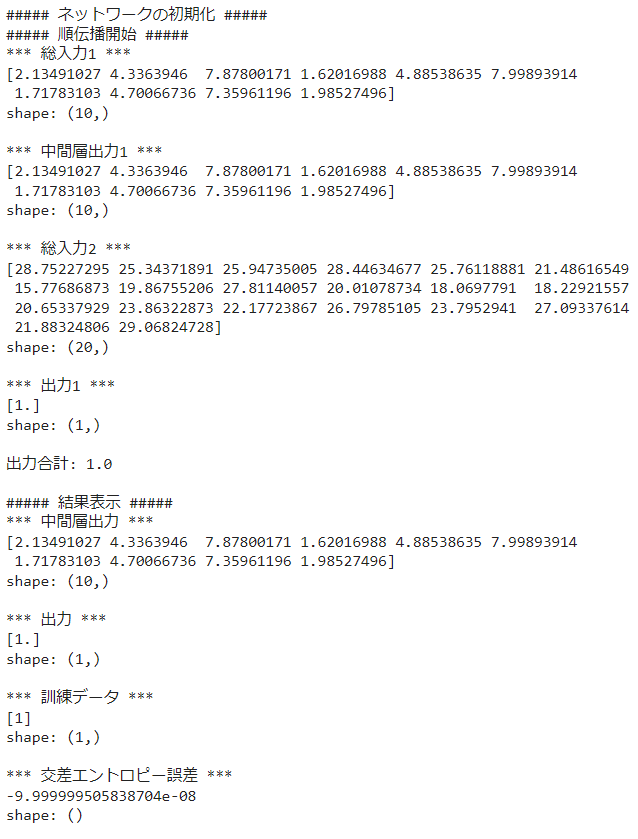

#### 内容

`1_1_forward_propagation.ipynb` の解答例である理解。


### 1_2_back_propagation.ipynb


#### キャプチャ

自身の環境において、最終コードセル[4]までの実行を確認した。


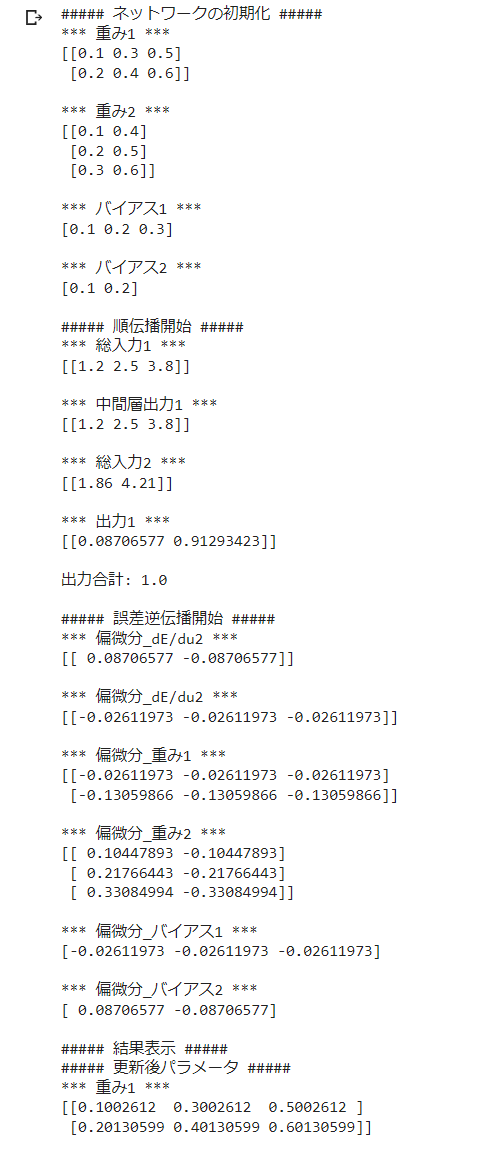

#### 内容

実装演習の際、確認した内容を記録する。


2-3-2 ネットワーク。<br>
出力層の活性化関数がソフトマックス関数で、誤差関数が交差エントロピー。また、出力層の合計が 1.0 ( 確率の総和 ) であることから分類問題。


順伝播の最後、出力層の活性化関数はソフトマックス関数 (`y = functions.softmax(u2)`)。<br>
対して逆伝播の出力層のデルタを計算するのに、 `d_sigmoid_with_loss` を使うのはなぜか理解できなかった。 `backward` 関数の以下の部分。

```python
    #  出力層でのデルタ
    delta2 = functions.d_sigmoid_with_loss(d, y)
```

この部分は、 "出力層活性化関数の微分" にあたる想定。
よって、順伝播 (`forward` 関数) の以下に対応する導関数として、
`functions.py` の `d_softmax_with_loss` (ソフトマックスとクロスエントロピーの複合導関数) を想定していたため。


`backward` の以下の部分については、上記  "出力層活性化関数の微分" の結果を利用した、
"中間層活性化関数の微分"
$
\frac{\partial{E}}{\partial{\textbf{y}}}
\frac{\partial{\textbf{y}}}{\partial{\textbf{u}^{(2)}}}
\frac{\partial{\textbf{u}^{(2)}}}{\partial{\textbf{z}}}
\frac{\partial{\textbf{z}}}{\partial{\textbf{u}^{(1)}}}
$
に対応するものと理解した。

```python
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
```

順伝播 (`forward`) の、中間層の活性化関数が、以下なので。

```python
    z1 = functions.relu(u1)
```


最後の `for` ループで誤差逆伝播法で得た勾配 'grad' と学習率で新たな重みとバイアスを計算している。
( ディクショナリ `grad` に 1層、2層の重み、バイアスが格納されていて、それぞれの勾配を学習率ととも適用 )


### 1_3_stochastic_gradient_descent.ipynb


#### キャプチャ

自身の環境において、最終コードセル[4]までの実行を確認した。


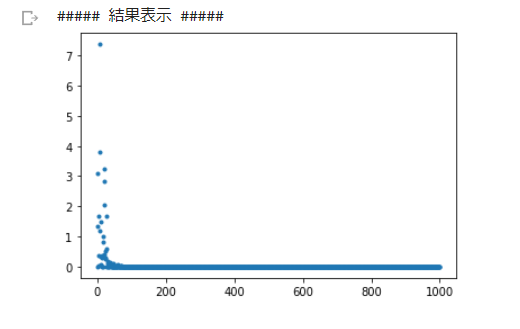

#### 内容

実装演習の際、確認した内容を記録する。


2-10-1 ネットワーク。

試しにシグモイド関数を使用すると、開始 200 回目までの誤差が多かった。
ReLU 関数の方が、早く誤差がなくなっていった。


確率的勾配降下法の実装部分は、以下。

```python
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)
```

上記で選択したサンプル ( 1,000 個 ) に対して、以下のループで1つ1つ勾配降下法を繰り返す。

```python
# 勾配降下の繰り返し
for dataset in random_datasets:
  ...
```

サンプルデータ 100,000 個全てを使わず、また、1つずつ勾配を計算する。


`1_3_stochastic_gradient_descent.ipynb` の確率的勾配降下法に対して、ミニバッチ法の実装を、以下にて確認した。

- [勾配法を実装しよう!【作って理解するディープラーニング#5】 | エビワークス](https://ebi-works.com/deeplearning-5/#outline__7_2)

- NOTE: `1_4_1_mnist_sample.ipynb` においても、ミニバッチ法を使っていたことを確認。


### 1_4_1_mnist_sample.ipynb


#### キャプチャ

自身の環境において、最終コードセル[3]までの実行を確認した。


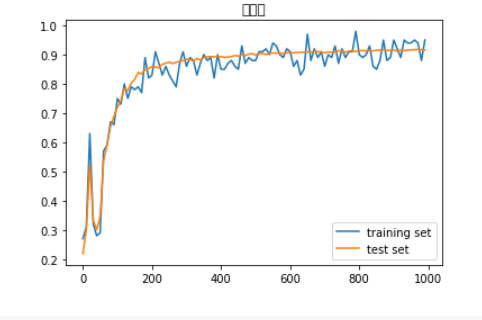

#### 内容

実装演習の際、確認した内容を記録する。


`1_2_back_propagation.ipynb` に対して、こちらでは、出力層の活性化関数: ソフトマックスの微分に、
`functions.d_softmax_with_loss` が使用されていることを確認。


中間層の活性化関数をシグモイド関数にして、試行した。

```python
# 順伝播
def forward(network, x):
...
    # z1 = functions.relu(u1)
    z1 = functions.sigmoid(u1)
...

# 誤差逆伝播
def backward(x, d, z1, y):
...
    # 1層でのデルタ
    # delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)
...
```

ReLU より学習が遅いことを確認した。


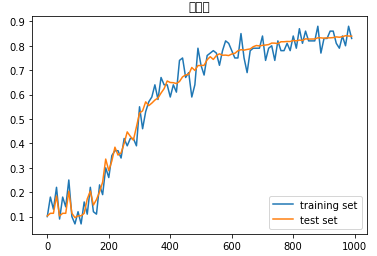